In [4]:
!pip install numpy matplotlib


In [1]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print("Using GPU:", tf.config.list_physical_devices('GPU'))
else:
    print("No GPU detected, using CPU.")

# Enable memory growth for GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU memory growth enabled.")


2025-02-16 18:27:33.642429: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739710653.758121     486 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739710653.797930     486 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Num GPUs Available: 1
Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU memory growth enabled.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "Rice_Image_Dataset"

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_labels = list(train_generator.class_indices.keys())
print("Rice Varieties:", class_labels)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Rice Varieties: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(len(class_labels), activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show Model Summary
model.summary()


/home/ravellavikhil/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1739552697.435799     407 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,037,125 (72.62 MB)

 Trainable params: 19,036,677 (72.62 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # Adjust epochs based on accuracy needs
    verbose=1
)


Epoch 1/15


I0000 00:00:1739552787.130466   77425 service.cc:148] XLA service 0x7f4258012750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739552787.131171   77425 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
I0000 00:00:1739552787.393087   77425 cuda_dnn.cc:529] Loaded cuDNN version 90501


   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:50 59ms/step - accuracy: 0.3090 - loss: 7.5463 

I0000 00:00:1739552791.930845   77425 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7547 - loss: 1.2412   

/home/ravellavikhil/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 214s 111ms/step - accuracy: 0.7547 - loss: 1.2408 - val_accuracy: 0.8177 - val_loss: 0.5401
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 190s 101ms/step - accuracy: 0.9323 - loss: 0.2322 - val_accuracy: 0.6571 - val_loss: 2.5044
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 98ms/step - accuracy: 0.9409 - loss: 0.2032 - val_accuracy: 0.9439 - val_loss: 0.2263
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 98ms/step - accuracy: 0.9611 - loss: 0.1336 - val_accuracy: 0.7835 - val_loss: 1.5451
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 98ms/step - accuracy: 0.9667 - loss: 0.1131 - val_accuracy: 0.8713 - val_loss: 0.5484
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 188s 100ms/step - accuracy: 0.9726 - loss: 0.0958 - val_accuracy: 0.9753 - val_loss: 0.0786
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 185s 99ms/step - accuracy: 0.9768 - loss: 0.0768 - val_accuracy: 0.8673 - val_loss: 0.4583
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 100ms/step - accuracy: 0.9791 

In [13]:
# Print final training accuracy
train_acc = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {train_acc * 100:.2f}%")

# Print final validation accuracy
val_acc = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")


Final Training Accuracy: 98.61%
Final Validation Accuracy: 99.42%


In [15]:
test_loss, test_acc = model.evaluate(train_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.9895 - loss: 0.0413
Test Accuracy: 98.94%


In [16]:
model.save("rice_classification_model.h5")

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('rice_classification_model.h5')

# Load and preprocess the image
img_path = 'images (1).jpeg'  # Update with your image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class index to the class label
class_labels = ['Class1', 'Class2', 'Class3']  # Update with your class labels
print(f"Predicted Class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Predicted Class: Class2


In [20]:
print(train_generator.class_indices)


{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


✅ Image validated successfully. Processing rice grains...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
✅ Best Predicted Rice Class: Basmati


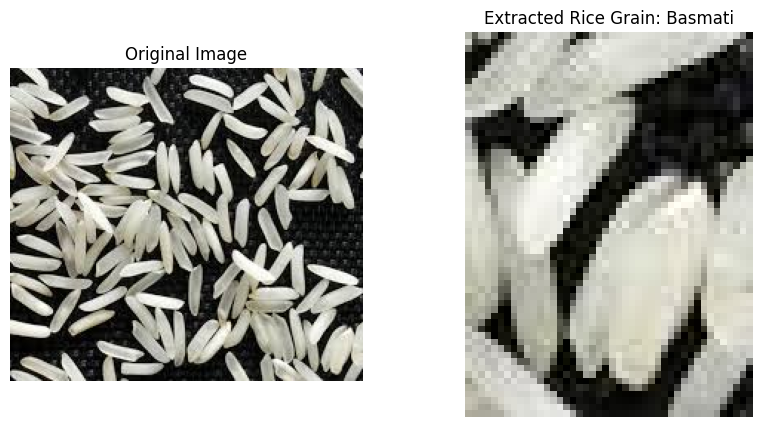

In [6]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter

# Load Pretrained Model
model = tf.keras.models.load_model("rice_classification_model.h5")

# Define Rice Class Labels
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

def is_blurry(image):
    """Detect if an image is blurry using Laplacian variance method."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance < 100  # Threshold for blur detection

def detect_rice_grains(image):
    """Detect if the image contains valid rice grains."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Adaptive Thresholding for Grain Detection
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    
    # Find Contours (Rice Grains)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter Valid Rice Grains
    rice_grains = [c for c in contours if 500 < cv2.contourArea(c) < 50000]
    
    return rice_grains

def validate_user_image(image_path):
    """Check if the user-given image is clear and contains rice grains."""
    
    # Load Image
    image = cv2.imread(image_path)
    
    if image is None:
        print("❌ Error: Invalid image file or path!")
        return False, None, None

    if is_blurry(image):
        print("❌ Image is blurry. Please provide a clear rice grain image.")
        return False, image, None

    rice_grains = detect_rice_grains(image)

    if len(rice_grains) < 2:  # At least two grains should be detected
        print("❌ No rice grains detected! Please provide a clear rice image.")
        return False, image, None

    print("✅ Image validated successfully. Processing rice grains...")
    return True, image, rice_grains

def extract_and_predict_rice_grains(image_path):
    """Detect, mask, extract, and classify valid rice grains from an image."""
    
    # Validate Image
    is_valid, image, rice_grains = validate_user_image(image_path)
    if not is_valid or rice_grains is None:
        return None, None

    rice_images = []
    extracted_rice_images = []

    for contour in rice_grains:
        # Extract Bounding Box and Crop
        x, y, w, h = cv2.boundingRect(contour)
        grain_cropped = image[y:y+h, x:x+w]

        # Resize while keeping RGB channels
        grain_resized = cv2.resize(grain_cropped, (150, 150))

        rice_images.append(grain_resized)
        extracted_rice_images.append(grain_cropped)

    if not rice_images:
        print("❌ No valid rice grains extracted. Check image clarity.")
        return None, None

    # Convert to Model Input Format
    rice_images = np.array(rice_images) / 255.0

    # Predict Rice Classes
    predictions = model.predict(rice_images)
    predicted_classes = [np.argmax(pred) for pred in predictions]

    # Get Most Common Predicted Class
    most_common_class = Counter(predicted_classes).most_common(1)[0][0]
    best_class_name = class_names[most_common_class]

    print(f"✅ Best Predicted Rice Class: {best_class_name}")

    # Convert Image to RGB Before Displaying
    input_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    best_rice_image_rgb = cv2.cvtColor(extracted_rice_images[0], cv2.COLOR_BGR2RGB)  # First detected grain

    # Show Original & Extracted Rice Grain
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(input_image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(best_rice_image_rgb)
    plt.title(f"Extracted Rice Grain: {best_class_name}")
    plt.axis("off")
    
    plt.show()

    return best_class_name, best_rice_image_rgb

# Example Usage
best_rice_class, rice_grain_image = extract_and_predict_rice_grains("images (1).jpeg")


In [64]:
pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
